In [1]:
# !pip install pyparsing==2.4.6
# !pip install tensorflow

In [2]:
import sys
sys.path.append("../utils/") 
from utilities import performance_metrics
import time

from src.core import Term, Atom
from src.ilp import Language_Frame, Program_Template, Rule_Template
from src.dilp import DILP
import tensorflow as tf
import numpy as np
from src.utils import process_file, process_dir, create_table, output_rules, test_rule, train, test
from src.generate_template import create_templates
import duckdb
tf.random.set_seed(1000)
np.random.seed(1000)
import dill


2024-06-15 10:50:50.881199: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 10:50:51.814648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
con = duckdb.connect(':memory:')
# enable automatic query parallelization
con.execute("PRAGMA threads=2")
# enable caching of parquet metadata
con.execute("PRAGMA enable_object_cache")


In [4]:
input_dir = '../examples/fraud-cart-short/'

input_table=create_table(con, input_dir, 'df')
print(f'ratio of positives %f' % (100*input_table['isFraud'].sum()/len(input_table)))
print(f'N= %f' % (len(input_table)))

ratio of positives 50.000000
N= 200.000000


### two targets

In [5]:
file_name = 'cart_dilp_Pe_m1_short_with_negation.dill'

In [6]:
with open(file_name, 'rb') as file:
    dilp = dill.load(file)

previous table dropped
----------------------------
isFraud(X_0)
isFraud(X_0) -> pred2(X_0),NOT{amount, 1.2966257333755493}(X_0)
isFraud(X_0) -> {oldbalanceDest, -0.0067258847411721945}(X_0),pred1(X_0)
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),pred2(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> NOT{external_dest, 0.5}(X_0),NOT{type_TRANSFER, 0.5}(X_0)
None
----------------------------
select "NOT{external_dest, 0.5}" and "NOT{type_TRANSFER, 0.5}" as "pred2",
 "pred2" and "pred2" as "pred1",
 "pred2" and "NOT{amount, 1.2966257333755493}" OR "{oldbalanceDest, -0.0067258847411721945}" and "pred1"  as "isFraud",

Performance of cart_dilp_Pe_m1_short_with_negation test set
Accuracy: 0.999318
Precision TP/(TP+FP): 0.973846
Recall TP/(TP+FN): 0.501188
F1 Score: 0.661788
MCC Score: 0.698376


'select "NOT{external_dest, 0.5}" and "NOT{type_TRANSFER, 0.5}" as "pred2",\n "pred2" and "pred2" as "pred1",\n "pred2" and "NOT{amount, 1.2966257333755493}" OR "{oldbalanceDest, -0.0067258847411721945}" and "pred1"  as "isFraud",\n'

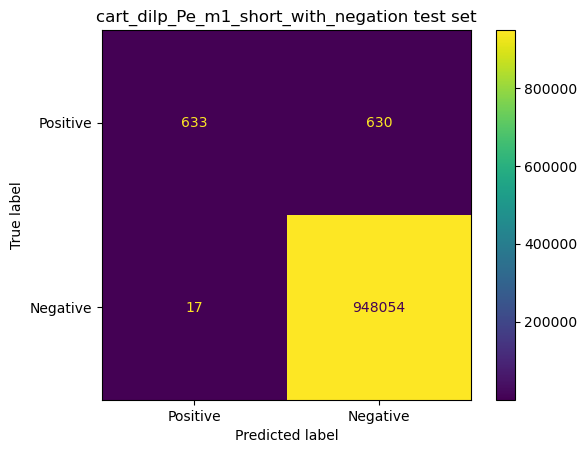

In [7]:
test(dilp, create_table(con, input_dir, 'df_test'), con, 'cart_dilp_Pe_m1_short_with_negation test set' )

previous table dropped
----------------------------
isFraud(X_0)
isFraud(X_0) -> pred2(X_0),NOT{amount, 1.2966257333755493}(X_0)
isFraud(X_0) -> {oldbalanceDest, -0.0067258847411721945}(X_0),pred1(X_0)
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),pred2(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> NOT{external_dest, 0.5}(X_0),NOT{type_TRANSFER, 0.5}(X_0)
None
----------------------------
select "NOT{external_dest, 0.5}" and "NOT{type_TRANSFER, 0.5}" as "pred2",
 "pred2" and "pred2" as "pred1",
 "pred2" and "NOT{amount, 1.2966257333755493}" OR "{oldbalanceDest, -0.0067258847411721945}" and "pred1"  as "isFraud",

Performance of cart_dilp_Pe_m1_short_with_negation train set
Accuracy: 0.715000
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 0.430000
F1 Score: 0.601399
MCC Score: 0.523341


'select "NOT{external_dest, 0.5}" and "NOT{type_TRANSFER, 0.5}" as "pred2",\n "pred2" and "pred2" as "pred1",\n "pred2" and "NOT{amount, 1.2966257333755493}" OR "{oldbalanceDest, -0.0067258847411721945}" and "pred1"  as "isFraud",\n'

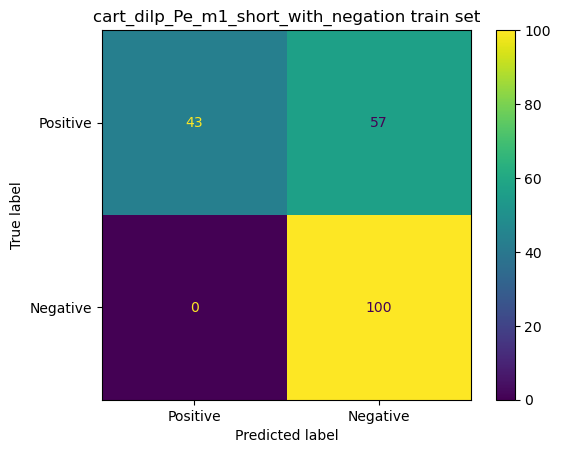

In [8]:
test(dilp, create_table(con, input_dir, 'df'), con, 'cart_dilp_Pe_m1_short_with_negation train set' )

In [9]:
file_name = 'cart_dilp_Pe_m1_short_1000_10_with_negation.dill'
with open(file_name, 'rb') as file:
    dilp = dill.load(file)

previous table dropped
----------------------------
isFraud(X_0)
isFraud(X_0) -> pred2(X_0),NOT{external_dest, 0.5}(X_0)
isFraud(X_0) -> NOT{amount, 3.0788129568099976}(X_0),pred1(X_0)
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),NOT{external_dest, 0.5}(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> {oldbalanceDest, -0.0067258847411721945}(X_0),NOT{type_TRANSFER, 0.5}(X_0)
None
----------------------------
select "{oldbalanceDest, -0.0067258847411721945}" and "NOT{type_TRANSFER, 0.5}" as "pred2",
 "pred2" and "NOT{external_dest, 0.5}" as "pred1",
 "pred2" and "NOT{external_dest, 0.5}" OR "NOT{amount, 3.0788129568099976}" and "pred1"  as "isFraud",

Performance of cart_dilp_Pe_m1_short_1000_10_with_negation.dill test set 
Accuracy: 0.999318
Precision TP/(TP+FP): 0.973846
Recall TP/(TP+FN): 0.501188
F1 Score: 0.661788
MCC Score: 0.698376


'select "{oldbalanceDest, -0.0067258847411721945}" and "NOT{type_TRANSFER, 0.5}" as "pred2",\n "pred2" and "NOT{external_dest, 0.5}" as "pred1",\n "pred2" and "NOT{external_dest, 0.5}" OR "NOT{amount, 3.0788129568099976}" and "pred1"  as "isFraud",\n'

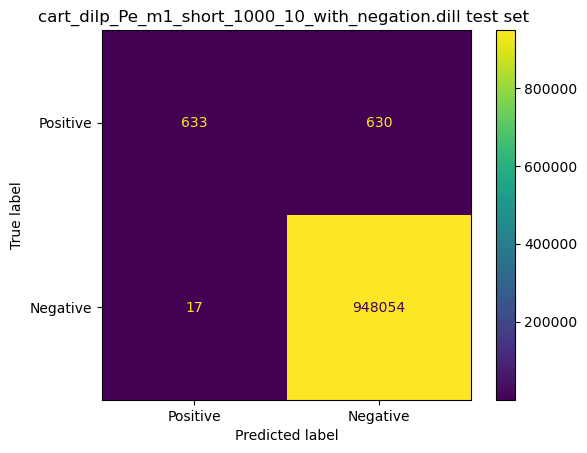

In [10]:
input_dir = '../examples/fraud-cart-short-1000-10/'
test(dilp, create_table(con, input_dir, 'df_test'), con, 'cart_dilp_Pe_m1_short_1000_10_with_negation test set ')


previous table dropped
----------------------------
isFraud(X_0)
isFraud(X_0) -> pred2(X_0),NOT{external_dest, 0.5}(X_0)
isFraud(X_0) -> NOT{amount, 3.0788129568099976}(X_0),pred1(X_0)
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),NOT{external_dest, 0.5}(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> {oldbalanceDest, -0.0067258847411721945}(X_0),NOT{type_TRANSFER, 0.5}(X_0)
None
----------------------------
select "{oldbalanceDest, -0.0067258847411721945}" and "NOT{type_TRANSFER, 0.5}" as "pred2",
 "pred2" and "NOT{external_dest, 0.5}" as "pred1",
 "pred2" and "NOT{external_dest, 0.5}" OR "NOT{amount, 3.0788129568099976}" and "pred1"  as "isFraud",

Performance of cart_dilp_Pe_m1_short_1000_10_with_negation.dill train set 
Accuracy: 0.996040
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 0.600000
F1 Score: 0.750000
MCC Score: 0.773052


'select "{oldbalanceDest, -0.0067258847411721945}" and "NOT{type_TRANSFER, 0.5}" as "pred2",\n "pred2" and "NOT{external_dest, 0.5}" as "pred1",\n "pred2" and "NOT{external_dest, 0.5}" OR "NOT{amount, 3.0788129568099976}" and "pred1"  as "isFraud",\n'

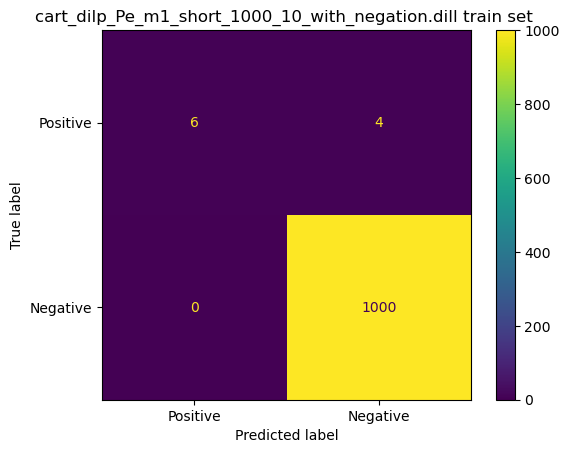

In [11]:
test(dilp, create_table(con, input_dir, 'df'), con, 'cart_dilp_Pe_m1_short_1000_10_with_negation.dill train set ')